[View in Colaboratory](https://colab.research.google.com/github/SaloniS95/DATA-VIZ-SPRING-2018-SCU/blob/master/data_viz_exploratory.ipynb)

# **HOUSING PRICES IN SANTA CLARA COUNTY**


## **INTRODUCTION **

It isn’t a new fact that the housing prices in the Bay Area have been skyrocketing over the last decade. The Bay Area is facing a major housing crisis and the prices here are much higher compared to other major cities in the USA. Some of the consequences of the increase in house prices are increased commute length, exodus from the area among other issues. We would like to explore what drives these increased housing prices and hence, the topic for our project is ‘Housing Prices In Santa Clara County.’

We plan to explore the relationship between zoning regulations, population and other such factors on housing prices and the number of housing units that are available in this region. We intend to analyze the data from the years 2013 to 2017/18.

In this document, we take the relevant datasets for our analysis, clean them and try to explore them so that, in the future,  we can come up with visualizations that will explain them in a simple and concrete way.
 

In [4]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import seaborn as sns
import pandas as pd
import numpy as np
%pylab inline

import sklearn as sk
import sklearn.tree as tree
from IPython.display import Image  


Populating the interactive namespace from numpy and matplotlib


#**Inventory for Sale**
The reason we want to find the the number of houses available for sale is to understand the housing supply situation. When the supply is lower, the house price should go up. 

**Dataset**

We obtained the inventory dataset from Zillow at the following link:
https://www.zillow.com/research/data/ 

**Data cleaning **:
1. Since we are mainly interested in Santa Clara County, we made a new dataframe that contains data for only Santa Clara County.

2. We then removed some unnecessary columns from Dataset: 
   i. We removed the columns for the year 2010, 2011 & 2012 because we were only interested in the data for the last five years.
    ii. Since our extracted dataframe contains data only for Santa Clara County, we removed other columns like RegionType,	CountyName, Metro, State, FullName, and DataTypeDescription that would only be of use if we were looking at multiple places.


**Limitations of Inventory:**
1. This dataset is at the county level. If we want to dive a little deeper and see the inventory for each city in the county, then granularity of the dataset restricts us there.

  

In [3]:
from google.colab import files
uploaded = files.upload()

In [25]:
df =pd.read_csv('InventoryMeasure_County_Public.csv', index_col=0)
df.head()

,RegionType,CountyName,Metro,StateFullName,DataTypeDescription,2010-01,2010-02,2010-03,2010-04,2010-05,...,2017-06,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03
RegionName,,,,,,,,,,,,,,,,,,,,,
Los Angeles,County,Los Angeles,Los Angeles-Long Beach-Anaheim,California,All Homes,30100,28997,28616,28317,27701,...,11566,11570,11645,11563,11365,10628,8947,8466,9287,9725
Cook,County,Cook,Chicago,Illinois,All Homes,29698,30106,32870,34568,33383,...,18280,18501,19226,19730,19449,17897,15531,13907,14592,15917
Harris,County,Harris,Houston,Texas,All Homes,23940,24737,27378,28026,26753,...,15838,16732,16692,14996,14360,14009,13346,12339,12252,12923
Maricopa,County,Maricopa,Phoenix,Arizona,All Homes,31302,32460,33663,34256,32642,...,17336,16865,16261,16364,17159,17623,16660,16326,17178,16962
San Diego,County,San Diego,San Diego,California,All Homes,10898,10900,12234,12502,12688,...,4898,5077,5218,5309,5168,5004,4334,4128,4472,4912


In [0]:
##Cleaning of Inventory Dataset:

In [0]:
df_santaclara =df.loc[(df.index=='Santa Clara'), ]

In [0]:
df_santaclara= df_santaclara[df_santaclara.columns.drop(list(df_santaclara.filter(regex='2010')))]
df_santaclara= df_santaclara[df_santaclara.columns.drop(list(df_santaclara.filter(regex='2011')))]
df_santaclara= df_santaclara[df_santaclara.columns.drop(list(df_santaclara.filter(regex='2012')))]
df_santaclara= df_santaclara[df_santaclara.columns.drop(list(df_santaclara.filter(regex='RegionType')))]
df_santaclara= df_santaclara[df_santaclara.columns.drop(list(df_santaclara.filter(regex='CountyName')))]
df_santaclara= df_santaclara[df_santaclara.columns.drop(list(df_santaclara.filter(regex='Metro')))]
df_santaclara= df_santaclara[df_santaclara.columns.drop(list(df_santaclara.filter(regex='StateFullName')))]
df_santaclara= df_santaclara[df_santaclara.columns.drop(list(df_santaclara.filter(regex='DataTypeDescription')))]
df_inventory_santaclara

In [0]:
df_inventory_santaclara =df_santaclara.transpose()                     ##Transpose 
#df_inventory_santaclara =df_inventory_santaclara.iloc[7:,]            ##remove unnecessary columns
df_inventory_santaclara.reset_index(level=0,inplace=True)
df_inventory_santaclara.columns=['Date','Units']

In [33]:
df_inventory_santaclara.head(5)

,Date,Units
0,2013-01,1362
1,2013-02,1554
2,2013-03,1704
3,2013-04,1779
4,2013-05,1957


In [0]:
##Extract year from Date
df_inventory_santaclara['Year']=(df_inventory_santaclara['Date'].str.split('-').str[0])

In [40]:
df_inventory_santaclara.head(5)

,Date,Units,Year
0,2013-01,1362,2013
1,2013-02,1554,2013
2,2013-03,1704,2013
3,2013-04,1779,2013
4,2013-05,1957,2013


In [41]:
#average inventory by year
df_inventory_santaclara[['Units']] = df_inventory_santaclara[['Units']].apply(pd.to_numeric)

avg_inventory_santaclara= df_inventory_santaclara.groupby('Year', as_index=False)['Units'].mean()
avg_inventory_santaclara.columns=['Date','Avg_Units']
avg_inventory_santaclara

,Date,Avg_Units
0,2013,1882.083333
1,2014,1788.666667
2,2015,1660.916667
3,2016,1668.666667
4,2017,1024.250000
5,2018,660.333333


In [20]:
sns.factorplot(x='Date', y= 'Avg_Units', data= avg_inventory_santaclara, kind='bar', aspect=3)

NameError: ignored

The inventory , over the years , is decreasing as it can be seen from the graph above 

 ## Number of  Housing Permits 
 Data Source : [Number of Housing Permits](https://fred.stlouisfed.org/series/BPPRIV006085)

The reason we are interested in analysing this dataset is because our intuition is that there is a strong relationship between the number of housing permits passed and the increase in the population in the Santa Clara County [ref2]. We would like to see the increase in the housing permits over the years compared to the increase in population in the Santa Clara County. If there is a negative relationship between these, it can explain why the housing prices in the Santa Clara County is increasing so fast. 

The housing permit dataset consists of 2 columns: year and average number of housing permits passed. 

The year is in yyyy-mm format. The title of the second column was changed to "Average_Housing_Permit" to make it more understandable.

Limitations of Data
The dataset consits of the average number of housing permits that were passed for the given years and no tht etotal number of permits passed. It would have helped us in our analysis if the dataset consisted of the total number of permits rather than the average 












In [5]:
from google.colab import files
uploaded = files.upload()

Saving housingpermit_new.csv to housingpermit_new (1).csv


In [6]:
df_newhouse=pd.read_csv('housingpermit_new.csv',index_col=0)
df_newhouse.head(5)

,CASANT5POP
DATE,
1970-01,1065.313
1971-01,1100.500
1972-01,1138.800
1973-01,1163.900
1974-01,1164.600


In [7]:
#renaming second column 
df_newhouse.reset_index(level=0,inplace=True)
df_newhouse.columns = ["Date","Average_Housing_permits"]
df_newhouse.head(5)


,Date,Average_Housing_permits
0,1970-01,1065.313
1,1971-01,1100.500
2,1972-01,1138.800
3,1973-01,1163.900
4,1974-01,1164.600


In [0]:
from google.colab import files

df_newhouse.to_csv('df_newhouse.csv')
files.download('df_newhouse.csv')


Exploring the number of permits passed over time :

In [9]:
import seaborn as sns
import pandas as pd
import numpy as np
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python2.7/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


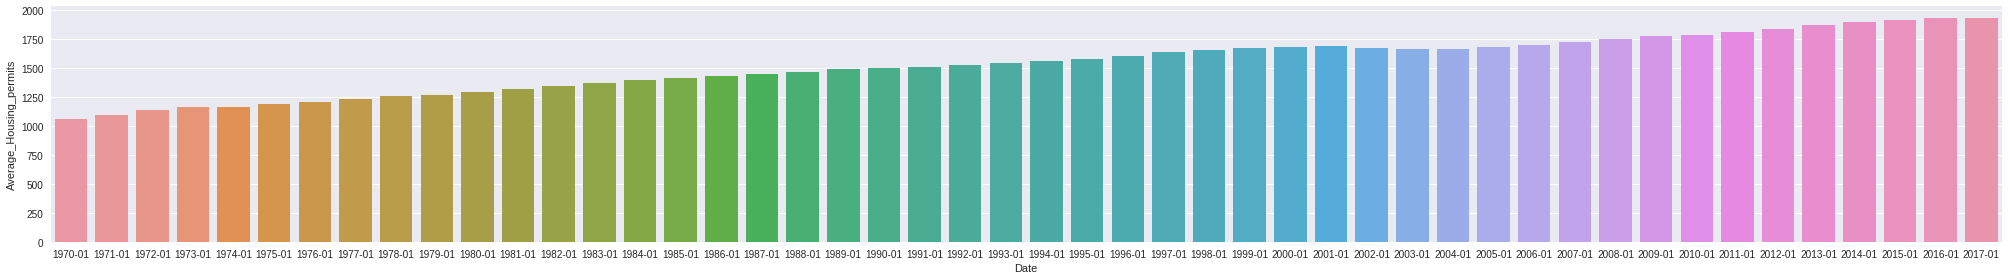

In [10]:
sns.factorplot(y='Average_Housing_permits',x='Date',data=df_newhouse,kind='bar',aspect=7)

As it can be seen from the above figure, the number of housing permits  passed increases over time. It will be interesting to see the difference in the number of housing permits passed compared to the population numbers.

# **Dataset 3: House Price Datset**
Data Source: [Zillow Research Sale Price Dataset](https://www.zillow.com/research/data/)

This is our main dataset. We obtained this dataset from Zillow Research. It consists of datasets of various different regions and states, but we are only interested in the 'Santa Clara' region data.

The dataset consists of monthly data from 2008 to 2018. Compared to other data resources of Santa Clara County house prices, such as the Census Bureau or S&P/Case-Shiller Home Price Indices, we found that Zillow has the most updated and county specific information. We define the “house price” as median sales price of all types of houses, which include single family houses, condos, and apartments.

We extracted the data for the particular region and analysed it . This dataset is the dataset with which we would like to compare/merge our other datasets with to see if our intuition and research regarding housing prices is correct or not. To clean it for future merging and use, we filtered to only the Santa Clara column and then transposed it so that each month was a row.

In [15]:
from google.colab import files
uploaded = files.upload()

Saving Sale_Prices.csv to Sale_Prices.csv


In [16]:
df_sale_price=pd.read_csv('Sale_Prices.csv',index_col=0)
df_sale_price.head(5)

,RegionName,StateName,SizeRank,2008-03,2008-04,2008-05,2008-06,2008-07,2008-08,2008-09,...,2017-06,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03
RegionID,,,,,,,,,,,,,,,,,,,,,
3101,Los Angeles,California,1,460100.0,447200.0,430000.0,419300.0,405700.0,389900.0,374000.0,...,554900.0,563000.0,565400.0,572700.0,575700.0,584300.0,586000.0,589300.0,594800.0,598400.0
139,Cook,Illinois,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,236800.0,233700.0,233400.0,229100.0,230600.0,231600.0,239100.0,243100.0,250400.0,266200.0
1090,Harris,Texas,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,192700.0,193700.0,196500.0,200600.0,206900.0,207700.0,205800.0,200600.0,201900.0,203000.0
2402,Maricopa,Arizona,4,229600.0,223500.0,217700.0,212200.0,204500.0,196800.0,187200.0,...,244500.0,245700.0,248200.0,250600.0,253300.0,255500.0,258900.0,259700.0,261300.0,259200.0
2841,San Diego,California,5,403000.0,394500.0,379800.0,368800.0,353200.0,340700.0,330800.0,...,521900.0,524200.0,527200.0,529700.0,530200.0,537500.0,541400.0,544400.0,544600.0,543800.0


In [17]:
df_sale_price=df_sale_price.loc[(df_sale_price.RegionName=='Santa Clara'), ]
df_sale_price

,RegionName,StateName,SizeRank,2008-03,2008-04,2008-05,2008-06,2008-07,2008-08,2008-09,...,2017-06,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03
RegionID,,,,,,,,,,,,,,,,,,,,,
3136,Santa Clara,California,14,667100.0,639600.0,621600.0,611000.0,602100.0,588700.0,564700.0,...,924300.0,937000.0,956800.0,980700.0,1019100.0,1047500.0,1099500.0,1123600.0,1170000.0,1193700.0


In [18]:
df_sale_price =df_sale_price.transpose()          ##Transposing the dataframe in order to better analyze the data
df_sale_price =df_sale_price.iloc[5:,]            ##removing unnecessary columns
df_sale_price.reset_index(level=0,inplace=True)
df_sale_price.columns=['Date','Sale_Price']    ##renaming the columns to more meaningful names 
df_sale_price.head(5)

,Date,Sale_Price
0,2008-05,621600
1,2008-06,611000
2,2008-07,602100
3,2008-08,588700
4,2008-09,564700


Exploring the dataset in order to see if there is any changes in the housing sale prices .

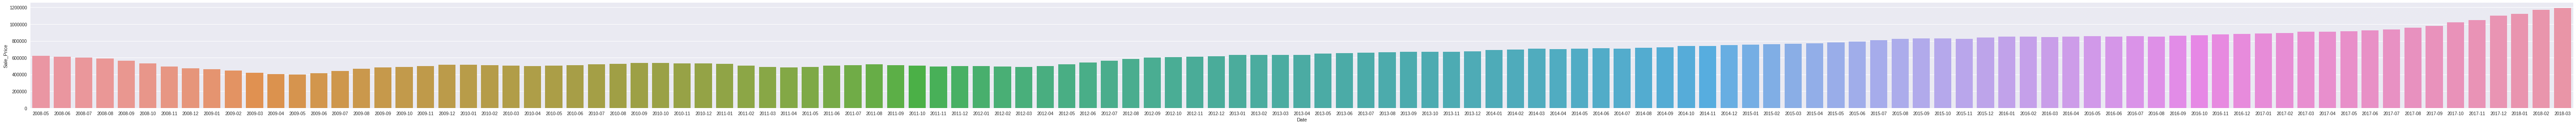

In [19]:
sns.factorplot(y='Sale_Price',x='Date',data=df_sale_price,kind='bar',aspect=20)

As we can see above, the graph looks like a wave, which we thought was interesting. It can be seen that during spring the sale prices dip slightly lower and then they increase for some months until the next spring. This shows the seasonality of the housing sale prices and we are interested in analyzing this further by aggregating the sale prices over the 'year' instead of the months. That might help us get a better understanding of our data and how it is influenced by other factors. 

#** Population Increase per Year**. 

We want to find the rate of population increase because we think that there will be a direct correlation between the rate of population increase and the growing need for more houses.

**Dataset Link**:
We found the population dataset at the following link:
(https://fred.stlouisfed.org/series/CASANT5POP)

**Data cleaning **

The data was initially monthly population counts and we want the yearly change. To do this, we selected only the January rows and calculated the difference year to year. We then used this difference to calculate the rate of increase.

**Limitation**

For this dataset, we have not found any limitations right now. It's monthly county level dataset, so we found it was easy to clean and a sufficient level of granularity.


In [3]:
from google.colab import files
uploaded = files.upload()

Saving Resident Population in Santa Clara County, CA.csv to Resident Population in Santa Clara County, CA.csv


In [0]:
df_pop =pd.read_csv('Resident Population in Santa Clara County, CA.csv',header=0)
df_pop=df_pop.rename(index=str, columns={"CASANT5POP": "population"})
df_pop['population'] = df_pop['population'].apply(lambda x: x*1000)
df_pop = df_pop[(df_pop['DATE'] == '2012-01-01')|(df_pop['DATE'] == '2013-01-01')| (df_pop['DATE'] =='2014-01-01')| (df_pop['DATE'] =='2015-01-01')| (df_pop['DATE'] =='2016-01-01')| (df_pop['DATE'] =='2017-01-01')]

In [0]:
df_pop['pop_t-1'] = df_pop['population'].shift(1) 
df_pop['pop_change'] = df_pop['population']- df_pop['pop_t-1']
#p['xx_1'] = p["xx"].shift(1) 

In [0]:
df_pop = df_pop[(df_pop['DATE'] == '2013-01-01')| (df_pop['DATE'] =='2014-01-01')| (df_pop['DATE'] =='2015-01-01')| (df_pop['DATE'] =='2016-01-01')| (df_pop['DATE'] =='2017-01-01')]

In [158]:
df_pop 

,DATE,population,pop_t-1,pop_change
43,2013-01-01,1870935.0,1841868.0,29067.0
44,2014-01-01,1896246.0,1870935.0,25311.0
45,2015-01-01,1919220.0,1896246.0,22974.0
46,2016-01-01,1931575.0,1919220.0,12355.0
47,2017-01-01,1938153.0,1931575.0,6578.0


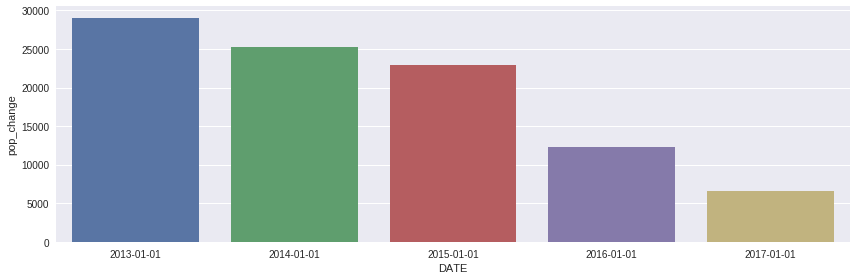

In [159]:
sns.factorplot(y='pop_change',x='DATE',data=df_pop,kind='bar',aspect=3)

# **Numbers of jobs per year.** 

The reason we want to find the number of jobs is because we think it is a potentially important factor in driving the local housing demand. 

**Link:**

We got the dataset for jobs at the [link text](https://fred.stlouisfed.org/series/SANJ906NA)

**Datacleaning:**

The data was initially monthly job counts and we want the yearly change. To do this, we selected only the January rows and calculated the difference year to year. We then used this difference to calculate the rate of increase.

**Limitation:**

We could not actually find the number of job creation of Santa Clara County. The dataset we can only find is titled  "Total Nonfarm in San Jose-Sunnyvale-Santa Clara" , so we are not sure this dataset includes the job in Palo Alto, Mountain View. 



In [160]:
from google.colab import files
uploaded = files.upload()

In [161]:
df_job =pd.read_csv('job.csv')
df_job=df_job.rename(index=str, columns={"SANJ906NA": "NumOfJobs"})
df_job['NumOfJobs'] = df_job['NumOfJobs'].apply(lambda x: x*1000)
df_job = df_job[(df_job['DATE'] == '2012-01-01')|(df_job['DATE'] == '2013-01-01')| (df_job['DATE'] =='2014-01-01')| (df_job['DATE'] =='2015-01-01')\
                | (df_job['DATE'] =='2016-01-01')|(df_job['DATE'] =='2017-01-01')|(df_job['DATE'] =='2018-01-01')]
df_job

,DATE,NumOfJobs
264,2012-01-01,905400.0
276,2013-01-01,944900.0
288,2014-01-01,983900.0
300,2015-01-01,1021200.0
312,2016-01-01,1057800.0
324,2017-01-01,1085900.0
336,2018-01-01,1116400.0


In [162]:
df_job['NumOfJobs_t-1'] = df_job['NumOfJobs'].shift(1) 
df_job['change'] = df_job['NumOfJobs']- df_job['NumOfJobs_t-1']
df_job = df_job[(df_job['DATE'] == '2013-01-01')| (df_job['DATE'] =='2014-01-01')| (df_job['DATE'] =='2015-01-01')| (df_job['DATE'] =='2016-01-01')| (df_job['DATE'] =='2017-01-01')]
df_job

,DATE,NumOfJobs,NumOfJobs_t-1,change
276,2013-01-01,944900.0,905400.0,39500.0
288,2014-01-01,983900.0,944900.0,39000.0
300,2015-01-01,1021200.0,983900.0,37300.0
312,2016-01-01,1057800.0,1021200.0,36600.0
324,2017-01-01,1085900.0,1057800.0,28100.0


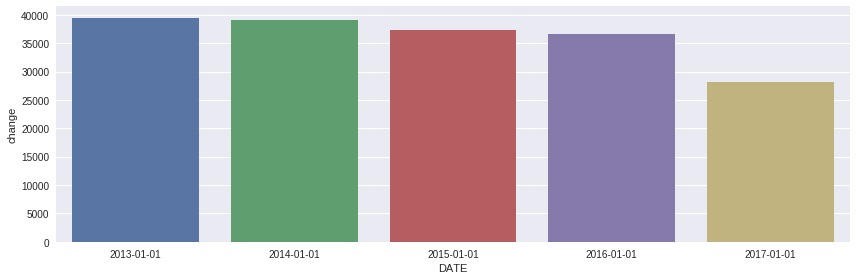

In [163]:
sns.factorplot(y='change',x='DATE',data=df_job,kind='bar',aspect=3)

# **Affordability**

**Sales**

[link text](https://) 

To explore the effect high housing prices have on people, we wanted to look at housing affordability.. 

**Dataset**

We obtained the  dataset for affordibility by combining the follwoing dataset :

1. Zillow house prices at (https://www.zillow.com/research/data/ )
   2.Median Household Income(https://www.zillow.com/research/data/


 

**Data cleaning **:
1.We needed to combine our house sales price data with our household median income data. Because the sales data was monthly while the income data was yearly, the first step (after cleaning up the columns and rows) was to aggregate the sales data by year. We were then able to merge the two datasets and compare the two trends.



**Limitations of Inventory:**
1. Range of the household income was very small (2013 to 2016). We could explore only for four year rang.

In [0]:
sales = pd.read_csv('Sale_Prices_County_Aff.csv')
sales.head()

In [0]:
SCC_sales = sales[sales.RegionName == 'Santa Clara']
SCC_sales

In [0]:
SCC_col = SCC_sales.transpose()
SCC_col.head()

In [0]:
SCC_col = SCC_col.drop(['RegionID','RegionName','StateName','SizeRank'], axis=0)
SCC_col.head()

In [0]:
SCC_col.reset_index(level=0,inplace=True)
SCC_col.head()

In [0]:
SCC_col.columns = ['YearMonth','Median_Sales_Price']

In [0]:
SCC_col['Year']= (SCC_col['YearMonth'].str.split('-').str[0])
SCC_col.head()

In [0]:
SCC_col['Median_Sales_Price'] = SCC_col['Median_Sales_Price'].apply(pd.to_numeric)
SCC_col['Year'] = SCC_col['Year'].apply(pd.to_numeric)

In [0]:
SCC_MSP_year = SCC_col.groupby('Year').mean()
SCC_MSP_year

In [0]:
SCC_MSP_year.reset_index(level=0,inplace=True)
SCC_MSP_year.columns = ['Year','Median_Sales_Price']
SCC_MSP_year

**Income**

In [0]:
from google.colab import files
uploaded = files.upload()

In [0]:
income = pd.read_excel('Household Income Year 2013 to 2017 Aff.xlsx')
income

In [0]:
income_T = income.transpose()
income_T.head()

In [0]:
SCC_med_inc = income_T[['Median household income']]
SCC_med_inc

In [0]:
SCC_med_inc.reset_index(level=0,inplace=True)
SCC_med_inc.columns = ['Year','Median_HH_Income']
SCC_med_inc

In [0]:
affordability = SCC_med_inc.merge(SCC_MSP_year, left_on = 'Year', right_on='Year')
affordability

In [0]:
affordability['Ratio'] = affordability.Median_Sales_Price/affordability.Median_HH_Income
affordability

In [0]:
sns.factorplot(x='Year', data=affordability, y='Ratio')

In [0]:
df_inventory_santaclara['Year']=(df_inventory_santaclara['Date'].str.split('-').str[0])
df_inventory_santaclara['Month']=(df_inventory_santaclara['Date'].str.split('-').str[1])
df_inventory_santaclara

In [0]:
df1= df_inventory_santaclara[df_inventory_santaclara['Month']=='01']
df1
df2= df1.shift(-1)
df2

**LIMITATIONS**
1. The best practice is to have all the data in the same time frame and frequency. However, we can not do it since some data has not published till 2017 or some data was publish in yearly, not monthly frequency. For these kinds of situations, in order to make all things consistent and comparable, we can only show data freqency in yearly manner or use some data till 2016 to make all visualizations. 

**ROADMAP**

Our roadmap is as follows: 
1. Merge the relevant datasets to see possible relation with price
2. Explore possible implications of high house price 
3. Explore possible solutions for the high house price problem

References :
[ref] Inventory Dataset:https://www.zillow.com/research/data/

[ref2] Dataset 2: Number of Housing Permits 
http://sf-planning.org/zoning-map

Affordibility Dataset:Zillow house prices at (https://www.zillow.com/research/data/ ) 2.Median Household Income(https://www.zillow.com/research/data/



